# Amazon Data Analysis

Here in the datasets we will be having a dataset in which we have the reviews of many customers about their purchase of amazon products ans also with some text corresponding to each customer, we will be predicting the upvotes of the customers according to data wre have.

In Data analysis we will use 2 algorithms 

1.Linear Regression

2.Decision Tree Regressor

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

### Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Preparation

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

## **Data Exploration**

In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np #for large and multi-dimensional arrays
import pandas as pd #for data manipulation and analysis
import nltk    

In [2]:
##reading dataset
df = pd.read_csv('../DataSets/Amazon_Product_Reviews.csv')

print(df.shape)
df.head()

(500, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns # printing what are all the columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## **Data Preparation**

In [4]:
### adding new column Helpful % for checking upvoting of customer
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
# assigning different different labels to helpful% according to its value
df['Helpful %'].unique() # checking all the unique values present in Helpful % column created

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154])

In [7]:
# cutting the data into different slices 
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0      80-100%
1          NaN
2      80-100%
3      80-100%
4          NaN
        ...   
495        NaN
496        NaN
497        NaN
498        NaN
499        NaN
Name: Helpful %, Length: 500, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [8]:
# storing this cut slices into new column
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
# Analysing upvotes for different different scores
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                              
1     Empty      9          9       9            9                     9   
      0-20%      1          1       1            1                     1   
      20-40%     6          6       6            6                     6   
      40-60%     1          1       1            1                     1   
      60-80%     0          0       0            0                     0   
      80-100%    6          6       6            6                     6   
2     Empty      2          2       2            2                     2   
      0-20%      1          1       1            1                     1   
      20-40%     1          1       1            1                     1   
      40-60%     1          1       1            1                     1   
      60-80%     1          1       1            1                     1   
      80-100%    5          5       5            5                     5   
3     Empty      4          4       4            4                     4   
      0-20%      0          0       0            0                     0   
      20-40%     5          5       5            5                     5   
      40-60%     2          2       2            2                     2   
      60-80%     2          2       2            2                     2   
      80-100%    6          6       6            6                     6   
4     Empty      3          3       3            3                     3   
      0-20%      0          0       0            0                     0   
      20-40%     0          0       0            0                     0   
      40-60%     1          1       1            1                     1   
      60-80%     2          2       2            2                     2   
      80-100%   17         17      17           17                    17   
5     Empty     10         10      10           10                    10   
      0-20%      0          0       0            0                     0   
      20-40%     2          2       2            2                     2   
      40-60%     5          5       5            5                     5   
      60-80%    11         11      11           11                    11   
      80-100%  112        112     112          112                   112   

               HelpfulnessDenominator  Time  Summary  Text  Helpful %  
Score %upvote                                                          
1     Empty                         9     9        9     9          9  
      0-20%                         1     1        1     1          1  
      20-40%                        6     6        6     6          6  
      40-60%                        1     1        1     1          1  
      60-80%                        0     0        0     0          0  
      80-100%                       6     6        6     6          6  
2     Empty                         2     2        2     2          2  
      0-20%                         1     1        1     1          1  
      20-40%                        1     1        1     1          1  
      40-60%                        1     1        1     1          1  
      60-80%                        1     1        1     1          1  
      80-100%                       5     5        5     5          5  
3     Empty                         4     4        4     4          4  
      0-20%                         0     0        0     0          0  
      20-40%                        5     5        5     5          5  
      40-60%                        2     2        2     2          2  
      60-80%                        2     2        2     2          2  
      80-100%                       6     6        6     6          6  
4     Empty                         3     3        3     3          3  
      0-20%                         0     0        0     0          0  

In [11]:
# considering only Id Column, as I have to count Total Upvotes for different different categories
# separating according to score 
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote     
1     Empty      9
      0-20%      1
      20-40%     6
      40-60%     1
      60-80%     0
      80-100%    6
2     Empty      2
      0-20%      1
      20-40%     1
      40-60%     1
      60-80%     1
      80-100%    5
3     Empty      4
      0-20%      0
      20-40%     5
      40-60%     2
      60-80%     2
      80-100%    6
4     Empty      3
      0-20%      0
      20-40%     0
      40-60%     1
      60-80%     2
      80-100%   17
5     Empty     10
      0-20%      0
      20-40%     2
      40-60%     5
      60-80%    11
      80-100%  112

In [12]:
# Now we create a Pivot Table for it, so for that we need to reset the index
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,9
1,1,0-20%,1
2,1,20-40%,6
3,1,40-60%,1
4,1,60-80%,0
5,1,80-100%,6
6,2,Empty,2
7,2,0-20%,1
8,2,20-40%,1
9,2,40-60%,1


In [13]:
# create Pivot Table for better conclusion
df_s.pivot(index='%upvote',columns='Score')

Id               
Score    1  2  3   4    5
%upvote                  
Empty    9  2  4   3   10
0-20%    1  1  0   0    0
20-40%   6  1  5   0    2
40-60%   1  1  2   1    5
60-80%   0  1  2   2   11
80-100%  6  5  6  17  112

## **Data Visualization**

Text(0.5, 1.0, 'How helpful users find among user scores')

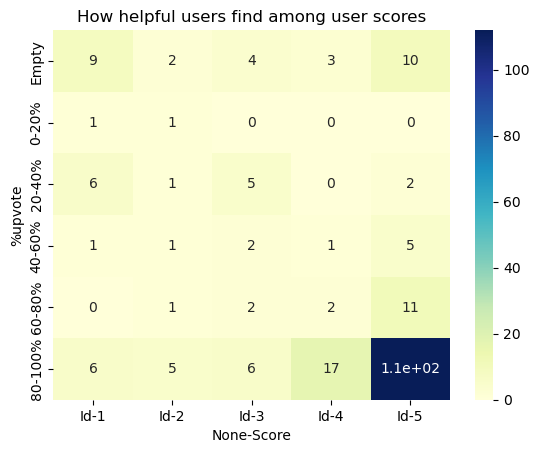

In [14]:
# for showing heatmap., we need to import seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [15]:
df.shape

(500, 12)

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [17]:
df['Score'].unique() # these are the unique scores we have

array([5, 1, 4, 2, 3], dtype=int64)

In [18]:
# Now here score 3 means nothing its neutral there fore we remove all those entries which has score as 3
df2 = df[df['Score'] != 3]
X = df2['Text']

# will classify in such a way that whenever we have score <3, we replace it with 0 else 1 
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

In [19]:
# score prediction, convert your text into vectors using NLP

from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')# created an object
# fitting the data
X_c = c.fit_transform(X)
print('rows: {}'.format(X_c.shape[0])) 
print('features: {}'.format(X_c.shape[1])) 

rows: 463
features: 3530


## **Data Training**

In [20]:
# Now we need to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 347


In [21]:
X_train[0]

<1x3530 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [22]:
y_train

259    1
289    1
127    1
404    1
438    1
      ..
202    1
313    1
48     1
470    1
225    1
Name: Score, Length: 347, dtype: int64

# **Model Creation**

### **Logistic Regression**

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train, y_train)
pred1 = log.predict(X_test)

# Making predictions 
log_score = round((log.score(X_test, y_test))*100, 2)
print("Accuracy of the Logistic regression model comes to be: ", log_score  ) 


Accuracy of the Logistic regression model comes to be:  84.48


### **Decision Tree Regressor**

In [24]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
dec = DecisionTreeRegressor()
dec.fit(X_train, y_train)
pred2 = dec.predict(X_test)

# Making predictions 
dec_score = round((dec.score(X_test, y_test))*100, 2)
print("Accuracy of the DT regressior model comes to be: ", dec_score  ) 

Accuracy of the DT regressior model comes to be:  -38.1


# **Performance Evaluation**

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), log.score(X_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), dec.score(X_train,y_train)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 0.3939 	 		 0.9942
Decision Tree Regressor		 0.4255 	 		 1.0000
